In [1]:
from qiskit import *
from qiskit.circuit.library import SXdgGate
from qiskit.visualization import plot_histogram

In [13]:
def zplg(i1, i2, i3, i4, i5):
    qc = QuantumCircuit(5,5)
    
    if i1 == '1':
        qc.x(0)
    if i2 == '1':
        qc.x(1)
    if i3 == '1':
        qc.x(2) 
    if i4 == '1':
        qc.x(3)
    if i5 == '1':
        qc.x(4)
    
    qc.barrier()
    qc.cx(1, 4)
    qc.cx(3, 0)
    
    #performing v gate
    
    qc.csx(0, 3)
    qc.csx(1, 3)
    qc.cx(0, 1)
    qc.csx(2, 3)
    qc.cx(1, 2)
    
    csxdg_gate = SXdgGate().control()
    qc.append(csxdg_gate, [2, 3])
    
    qc.cx(3, 4)
    
    
    qc.measure(0, 4)
    qc.measure(1, 3)
    qc.measure(2, 2)
    qc.measure(3, 1)
    qc.measure(4, 0)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qc, output

input is  0 0 0 0 0 output is  00000
input is  0 0 0 0 1 output is  00001
input is  0 0 0 1 0 output is  11111
input is  0 0 0 1 1 output is  11110
-------------------------------------
input is  0 0 1 0 0 output is  00100
input is  0 0 1 0 1 output is  00101
input is  0 0 1 1 0 output is  11000
input is  0 0 1 1 1 output is  11001
-------------------------------------
input is  0 1 0 0 0 output is  01101
input is  0 1 0 0 1 output is  01100
input is  0 1 0 1 0 output is  10001
input is  0 1 0 1 1 output is  10000
-------------------------------------
input is  0 1 1 0 0 output is  01010
input is  0 1 1 0 1 output is  01011
input is  0 1 1 1 0 output is  10101
input is  0 1 1 1 1 output is  10100
-------------------------------------
input is  1 0 0 0 0 output is  11100
input is  1 0 0 0 1 output is  11101
input is  1 0 0 1 0 output is  00011
input is  1 0 0 1 1 output is  00010
-------------------------------------
input is  1 0 1 0 0 output is  11011
input is  1 0 1 0 1 output is  11

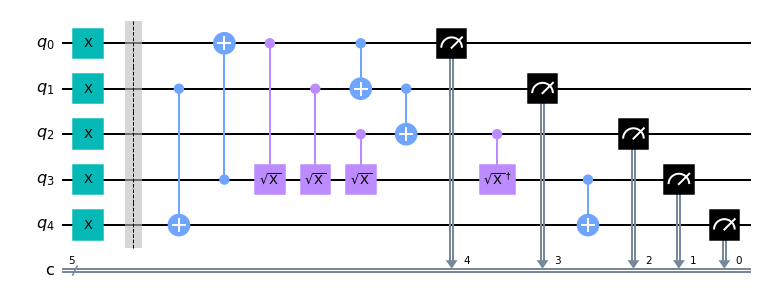

In [14]:
for i1 in ['0', '1']:
    for i2 in ['0', '1']:
        for i3 in ['0', '1']:
            for i4 in ['0', '1']:
                for i5 in ['0', '1']:
                    qc, output = zplg(i1, i2, i3, i4, i5)
                    print("input is ", i1, i2, i3, i4, i5, "output is ", output )
            print("-------------------------------------")
qc.draw('mpl')

double feynman gate

In [4]:
#doublefeynman gate
qcf = QuantumCircuit(3)
qcf.cx(0, 2)
qcf.cx(0, 1)
f2g_gate = qcf.to_gate()
f2g_gate.draw('mpl')


AttributeError: 'Gate' object has no attribute 'draw'

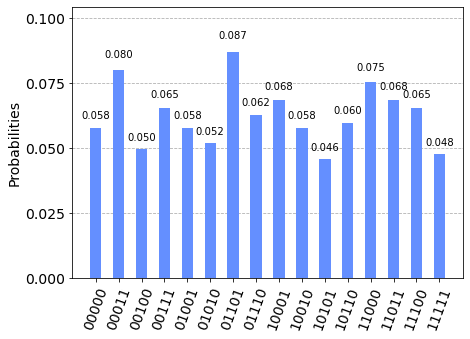

In [8]:
#histogram plot of the zplg gate

qc = QuantumCircuit(5,5)
for i in range(4):
    qc.h(i)
qc.cx(1, 4)
qc.cx(3, 0)
#performing v gate
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)

csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])

qc.cx(3, 4)

qc.measure(0, 4)
qc.measure(1, 3)
qc.measure(2, 2)
qc.measure(3, 1)
qc.measure(4, 0)

job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
plot_histogram(count)

A B C D E   PQRST
0 0 0 0 0 = 00000
0 0 0 0 1 = 00001
0 0 0 1 0 = 11111
0 0 0 1 1 = 11110
0 0 1 0 0 = 00100
0 0 1 0 1 = 00101
0 0 1 1 0 = 11000
0 0 1 1 1 = 11001
0 1 0 0 0 = 01101
0 1 0 0 1 = 01100
0 1 0 1 0 = 10001
0 1 0 1 1 = 10000
0 1 1 0 0 = 01010
0 1 1 0 1 = 01011
0 1 1 1 0 = 10101
0 1 1 1 1 = 10100
1 0 0 0 0 = 11100
1 0 0 0 1 = 11101
1 0 0 1 0 = 00011
1 0 0 1 1 = 00010
1 0 1 0 0 = 11011
1 0 1 0 1 = 11010
1 0 1 1 0 = 00111
1 0 1 1 1 = 00110
1 1 0 0 0 = 10010
1 1 0 0 1 = 10011
1 1 0 1 0 = 01110
1 1 0 1 1 = 01111
1 1 1 0 0 = 10110
1 1 1 0 1 = 10111
1 1 1 1 0 = 01001
1 1 1 1 1 = 01000
____________________________
To draw the quantum circuit for the zplg gate in block circuit


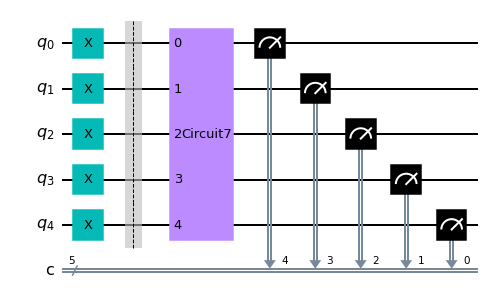

____________________________
To draw the quantum circuit for the zplg gate in gate form


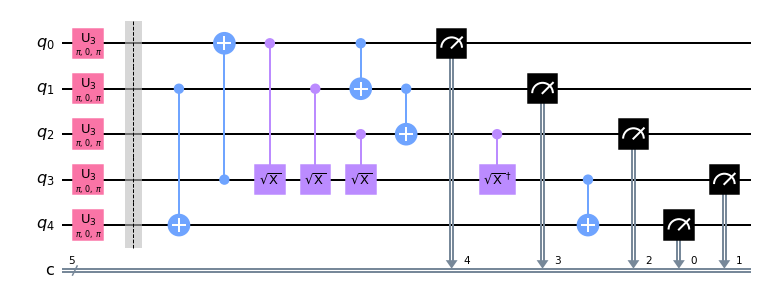

_______________________________
The histogram plot for the ZPLG gate


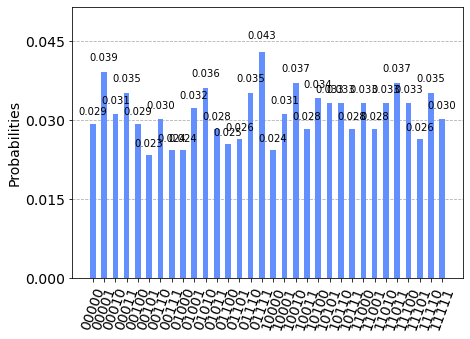

In [2]:
#ZPLG gate
qc = QuantumCircuit(5)
qc.cx(1, 4)
qc.cx(3, 0)
qc.csx(0, 3)
qc.csx(1, 3)
qc.cx(0, 1)
qc.csx(2, 3)
qc.cx(1, 2)
csxdg_gate = SXdgGate().control()
qc.append(csxdg_gate, [2, 3])
qc.cx(3, 4)
zplg_gate = qc.to_gate()

#defining a function to check the output for all the combinations
def zplg_new(inp1, inp2, inp3, inp4, inp5):
    
    qc = QuantumCircuit(5, 5)
    #conditions
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)
    if(inp4 == '1'):
        qc.x(3)
    if(inp5 == '1'):
        qc.x(4)
       
    qc.barrier()
    #appending the zplg gate
    qc.append(zplg_gate, [0, 1, 2, 3, 4])
   
    #measurements for all inputs
    qc.measure(0, 4)
    qc.measure(1, 3)
    qc.measure(2, 2)
    qc.measure(3, 1)
    qc.measure(4, 0)
    qc.draw()

     #using Aer backend and qasm simulator
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, memory= True)
    output = job.result().get_memory()[0]
    return qc, output



#looping over to get all possible combinations
print('{} {} {} {} {}'.format('A', 'B', 'C', 'D', 'E'), '  PQRST' )
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        for inp3 in ['0', '1']:
            for inp4 in ['0', '1']:
                for inp5 in ['0', '1']:
                    qc, output = zplg_new(inp1, inp2, inp3, inp4, inp5)
                    print('{} {} {} {} {}'.format(inp1, inp2, inp3, inp4, inp5), '=', output)
            

#to draw the quantum circuit for the ZPLG gate
print('____________________________')
print('To draw the quantum circuit for the zplg gate in block circuit')
display(qc.draw('mpl'))
print('____________________________')
print('To draw the quantum circuit for the zplg gate in gate form')
display(qc.decompose().draw('mpl'))

#plotting the histogram
qc_hist = QuantumCircuit(5, 5)
qc_hist.append(zplg_gate, [0, 1, 2, 3, 4])
for i in range(5):
    qc_hist.h(i)
qc_hist.measure(0, 4)
qc_hist.measure(1, 3)
qc_hist.measure(2, 2)
qc_hist.measure(3, 1)
qc_hist.measure(4, 0)
job = execute(qc_hist, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
count = result.get_counts()
print('_______________________________')
print('The histogram plot for the ZPLG gate')
plot_histogram(count)